# Создание парсера для сайта headhunter.  Автоматизация и ежедневный сбор количества вакансий, резюме, кандидатов и компаний. Анализ таблички Excel

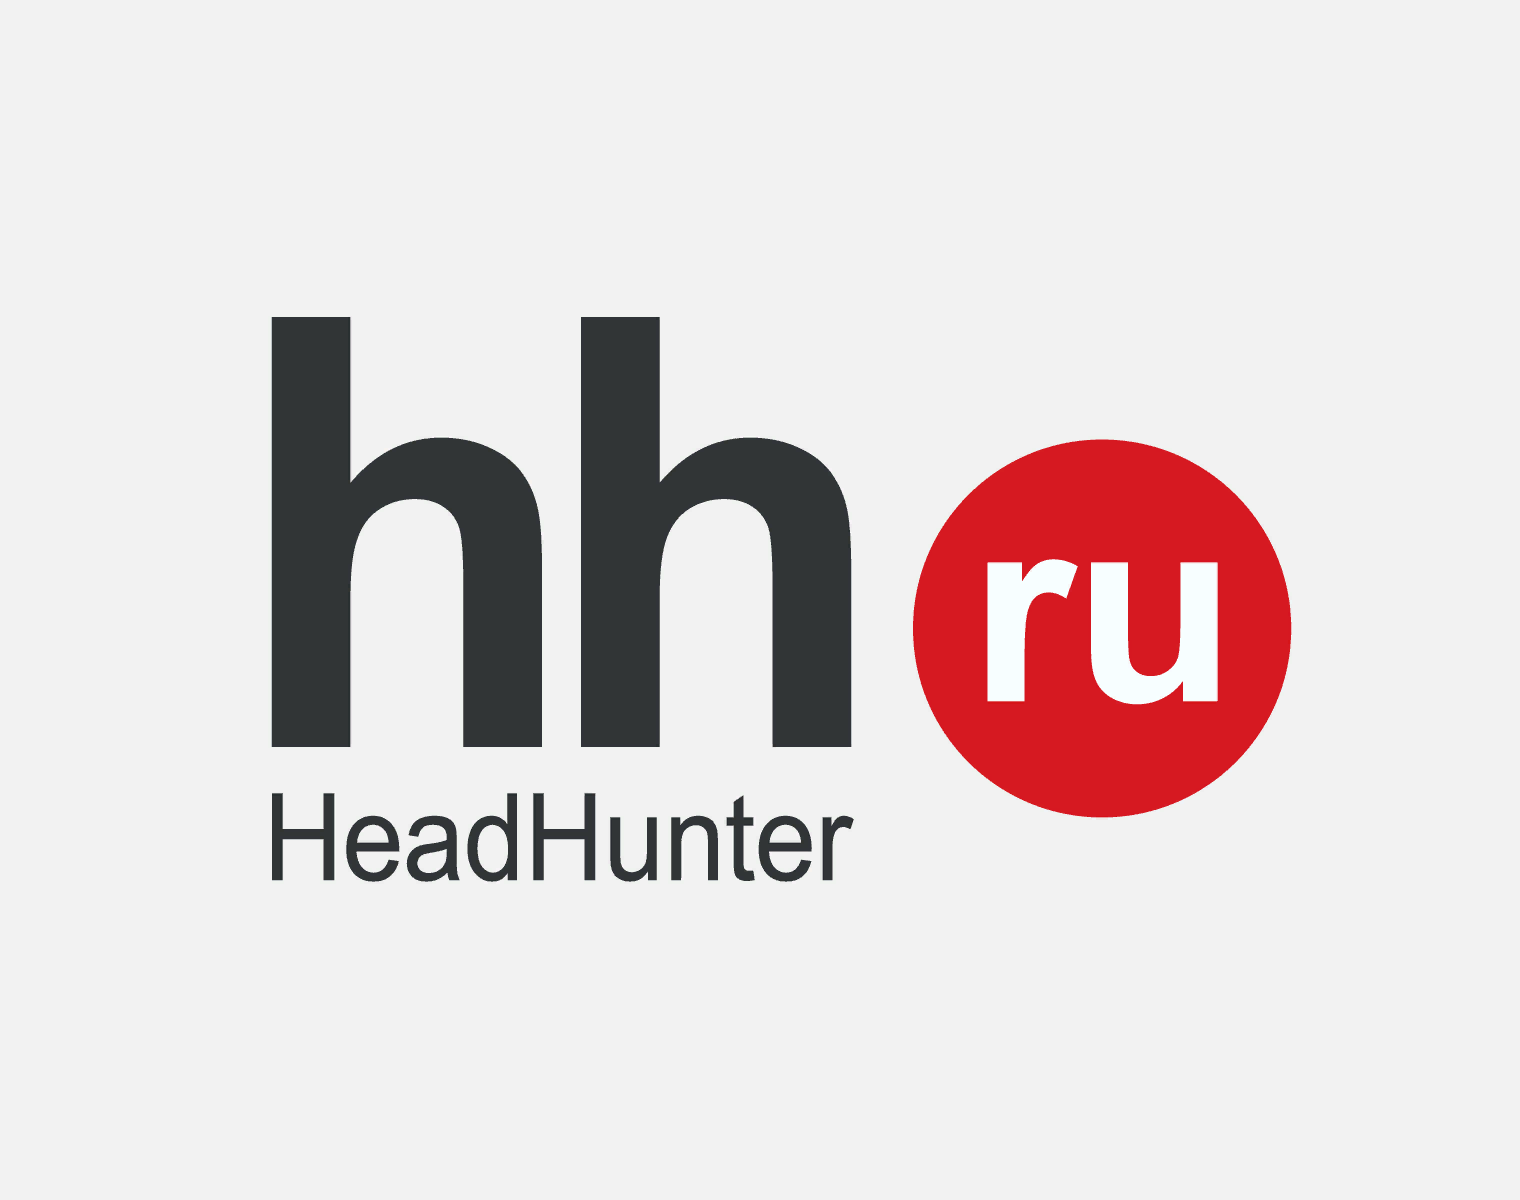

## Пишем парсер. Записываем данные в файл

Самое первое, что необходимо, это загрузить необходимые библиотеки для корректной работы. Они нам помогут непосредственно для парсинга информации

In [ ]:
pip install beautifulsoup4
pip install requests
pip install fake-useragent

Теперь обратимся к непосредственно библиотекам и импортируем нужные нам модули оттуда 

In [ ]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import csv
import datetime

Установим соединение и произведем первый запрос к странице сайта с вакансиями 

In [ ]:
UserAgent().chrome
page_link = 'https://hh.ru/search/vacancy?area=113&search_field=name&search_field=company_name&search_field=description&text'
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
html = response.content
soup = BeautifulSoup(html,'html.parser')

Далее найдем количество вакансий

In [ ]:
info1 = soup.find(lambda tag: tag.name == 'h1' and tag.get('class') == ['bloko-header-section-3']).text
vacancy = ''
numbers = ['0','1','2','3','4','5','6','7','8','9']
for i in info1:
    if i in numbers:
        vacancy += i
vacancy = int(vacancy)

Перейдем на страницу с резюме и кандидатами и выгрузим необходимые данные 

In [ ]:
page_link = 'https://hh.ru/search/resume?text=&logic=normal&pos=full_text&exp_period=all_time&exp_company_size=any&exp_industry=any&area=113&relocation=living_or_relocation&salary_from=&salary_to=&currency_code=RUR&age_from=&age_to=&gender=unknown&order_by=relevance&search_period=0&items_on_page=50&no_magic=false'
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
html = response.content
soup = BeautifulSoup(html,'html.parser')
info2 = soup.find(lambda tag: tag.name == 'div' and tag.get('class') == ['bloko-header-section-3']).text
res = info2.split()
res.remove('Найдено')
res.remove('резюме')
if 'соискателей' in res:
    res.remove('соискателей')
else:
    res.remove('соискателя')
res.remove('у')
resume = ''
candidate = ''
a = len(res)//2
for i in range(a):
    resume += res[i]
for i in range(a,len(res)):
    candidate += res[i]
resume = int(resume)
candidate= int(candidate)

Наконец, найдем количество компаний 

In [ ]:
page_link = 'https://hh.ru/employers_list?query=&areaId=113'
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
html = response.content
soup = BeautifulSoup(html,'html.parser')
info3 = soup.find(lambda tag: tag.name == 'div' and tag.get('class') == ['totals--rE1moq2jhLukW5QVcI6L']).text
company = ''
for i in info3:
    if i in numbers:
        company += i
company = int(company)

В итогом Exсel файле мы хотим видеть дату, в какой день какие показатели наблюдались. Для этого ранее мы импортировали библиотеку datatime, с помощью которой мы сможем найти текущую дату

In [ ]:
today = datetime.datetime.today()
date = today.strftime('%d.%m.%Y')

Ну вот и все, парсинг закончен. Вся необходимая информация собрана нами, теперь можно приступать к непосредственному сохранению этой информации

Ранее мы импортировали библиотеку csv, она нам поможет для записи собранной инфы в csv файл, который в конечном итоге мы будем открывать в Exсel 

In [ ]:
with open('hhparcer', 'a', encoding='utf-8-sig', newline='') as fil:
                writer = csv.writer(fil, delimiter = ";")
                writer.writerow((
                    date,
                    vacancy,
                    resume,
                    candidate,
                    company
                ))

Сейчас при запуске программы будет происходить следующее:

При первом запуске в папке проекта будет создан файл с названием "hhparcer", куда будут последовательно записаны дата, вакансии, резюме, кандидаты и компании. Разделителем будет служить ";"

Примерно так это будет выглядеть:

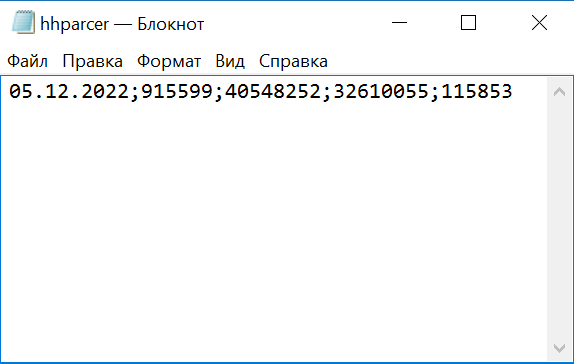

Далее вручную впишем в файл с данными первой строчкой названия столбцов, чтобы выглядело примерно так:

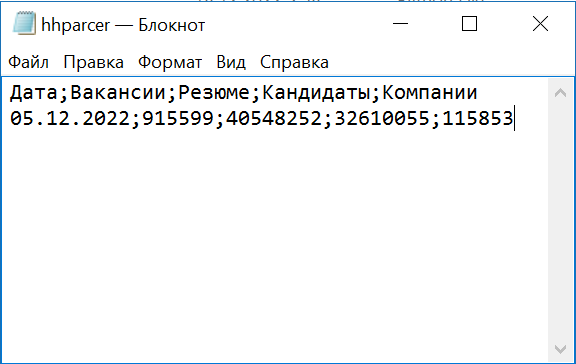

При дальнейших запусках вся новая информация будет записываться с новой строчки:

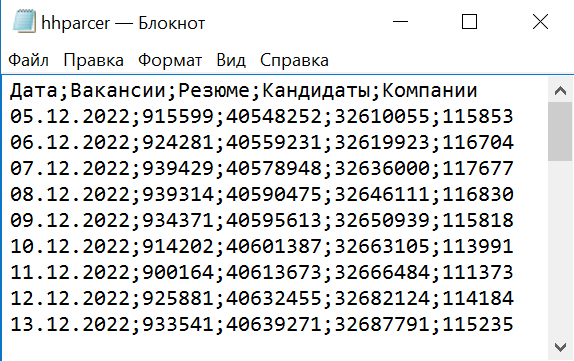

## Автоматизация кода. Планировщик задач

Мы получили код, который в целом можно запускать каждый день вручную и пополнять нашу базу данных свежей информацией, однако кто хочет заниматься этим каждый день?

С целью решить эту проблему можно использовать встроенный в Windows планировщик задач, который позволит автоматизировать процесс сбора данных

Для настройки планировщика задач я первым делом решил преобразовать свой файл с форматом ".py" в EXE-файл 

Это сделано для того, чтобы облегчить работу с планировщиком, а также иметь возможность в дальнейшем запустить такой файл на компьютере, на котором не установлен python 

Подгрузим библиотеку:

In [ ]:
pip install auto-py-to-exe

Далее в терминале пропишем команду:

In [ ]:
auto-py-to-exe

Перед нами появилось окно, в котором необходимо указать путь до нашего python-файла. Желательно далее отключить антивирус, так как антивирусы обычно блокируют создание exe файлов на компьютере 

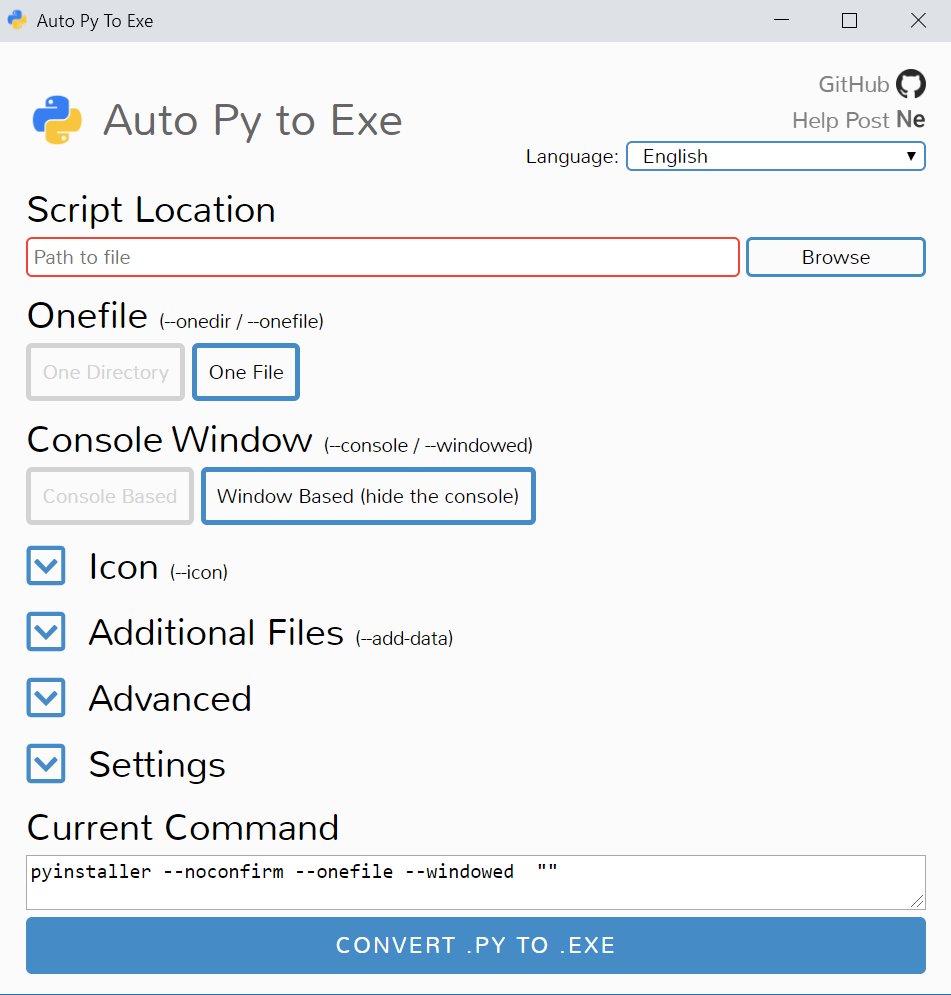

Немного ждем и после окончания конверсии python в exe в папке проекта у нас лежит папка "output"

В ней мы как раз и можем видеть наш EXE-файл. Запустим его. Программа выполнилась. Замечаем, что здесь же появился csv файл "hhparcer" в котором лежат наши результаты парсинга. 

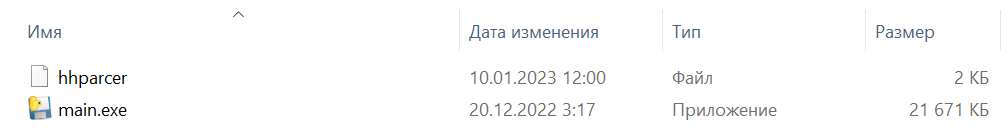

Далее можем также вручную прописать в начале файла названия столбцов, ведь потом именно этот файл мы будем использовать для будущей таблицы 

Пришло время настроить планировщик задач. Для этого откроем его:

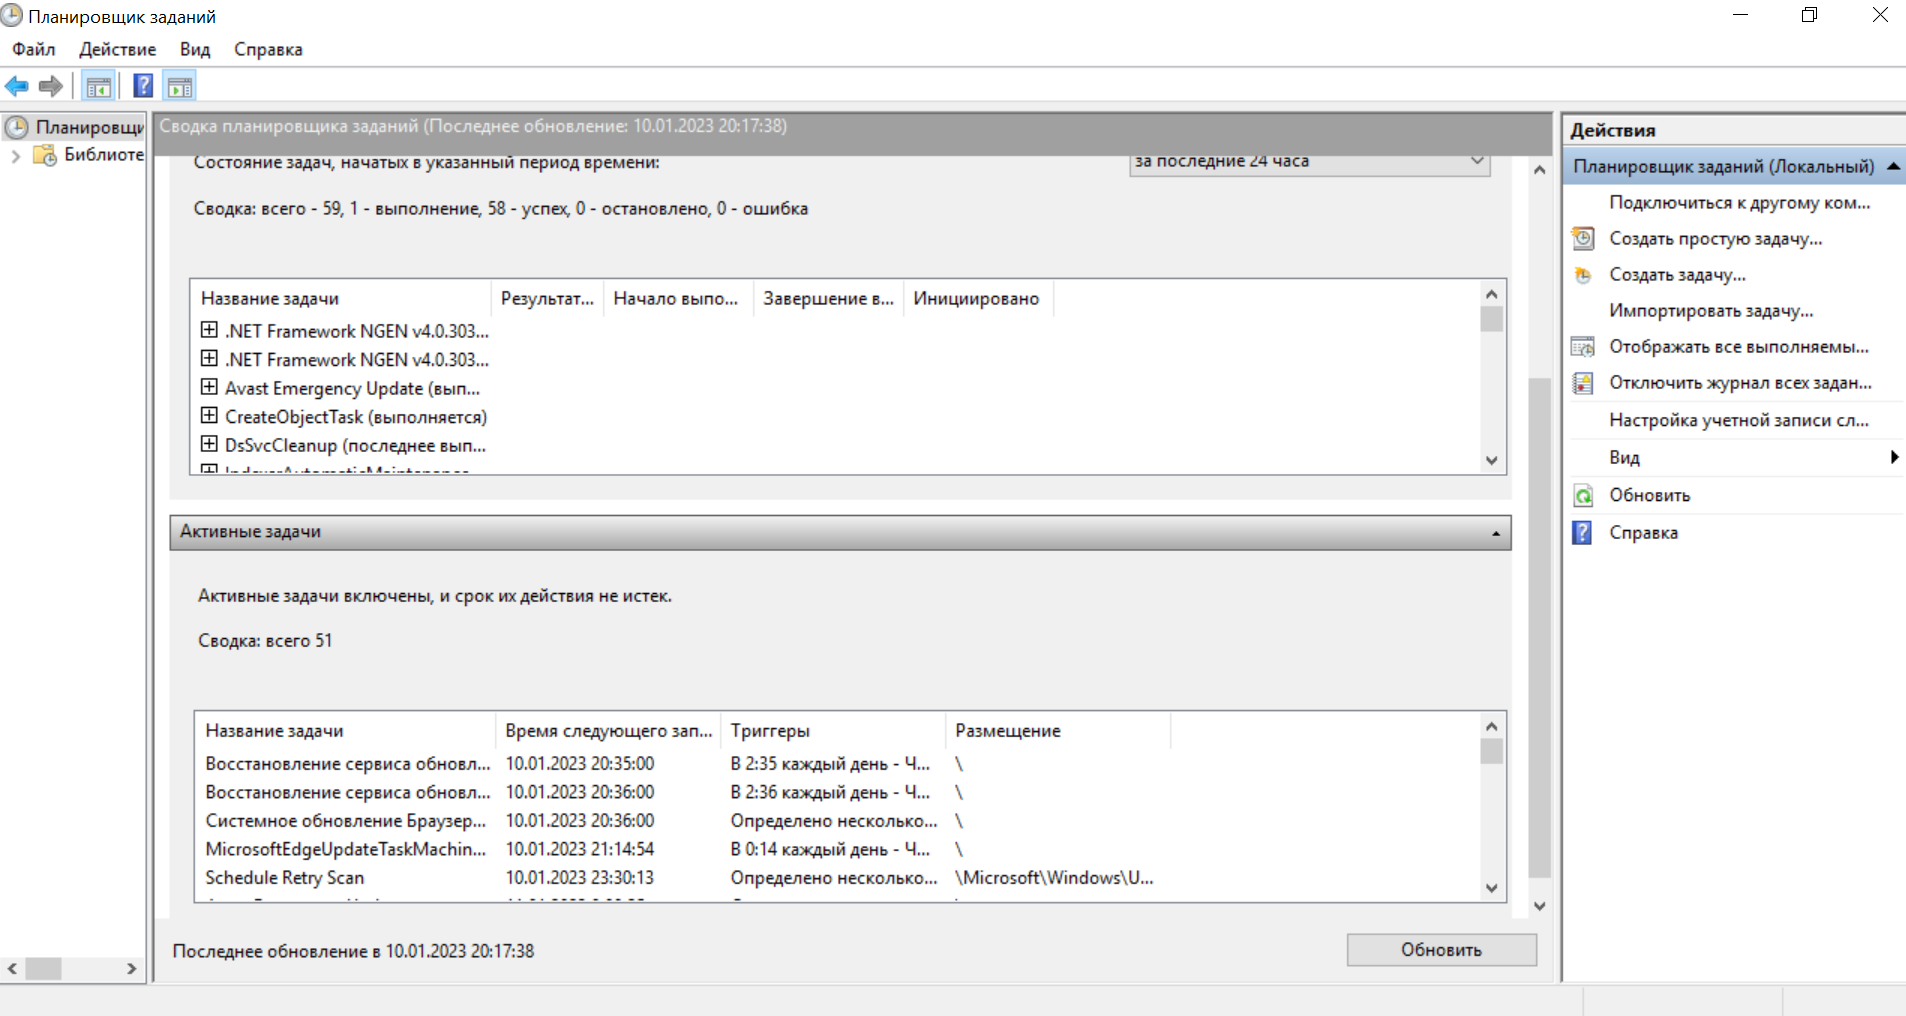

Здесь мы видим различные задачи, которые в автоматическом режиме выполняются в вашей системе Windows, о которых возможно вы даже и не знали 

Перейдем во вкладку "Действие" и выберем "Создать простую задачу..."

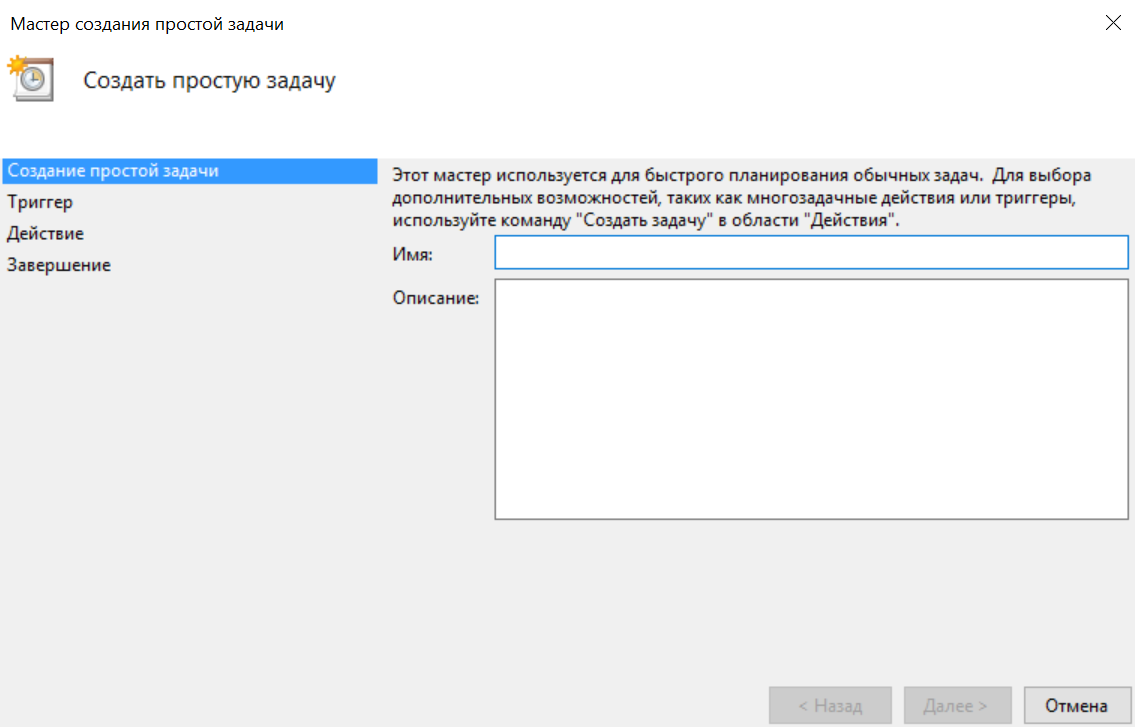

Задаем имя задачи и ее описание

Затем выбираем триггер для задачи. Так как цель собирать данные ежедневно, то выбираем соответствующий пункт

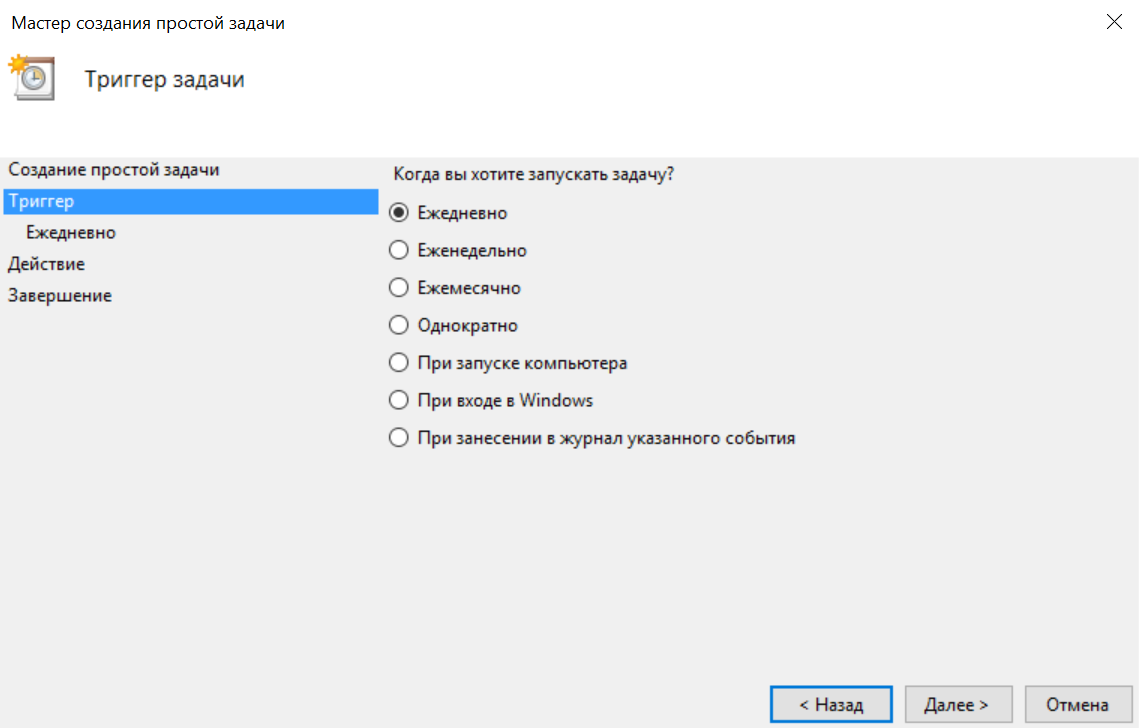

Далее можем указать время, в которое наша задача будет запускаться. Выберем, например 12:00 каждый день

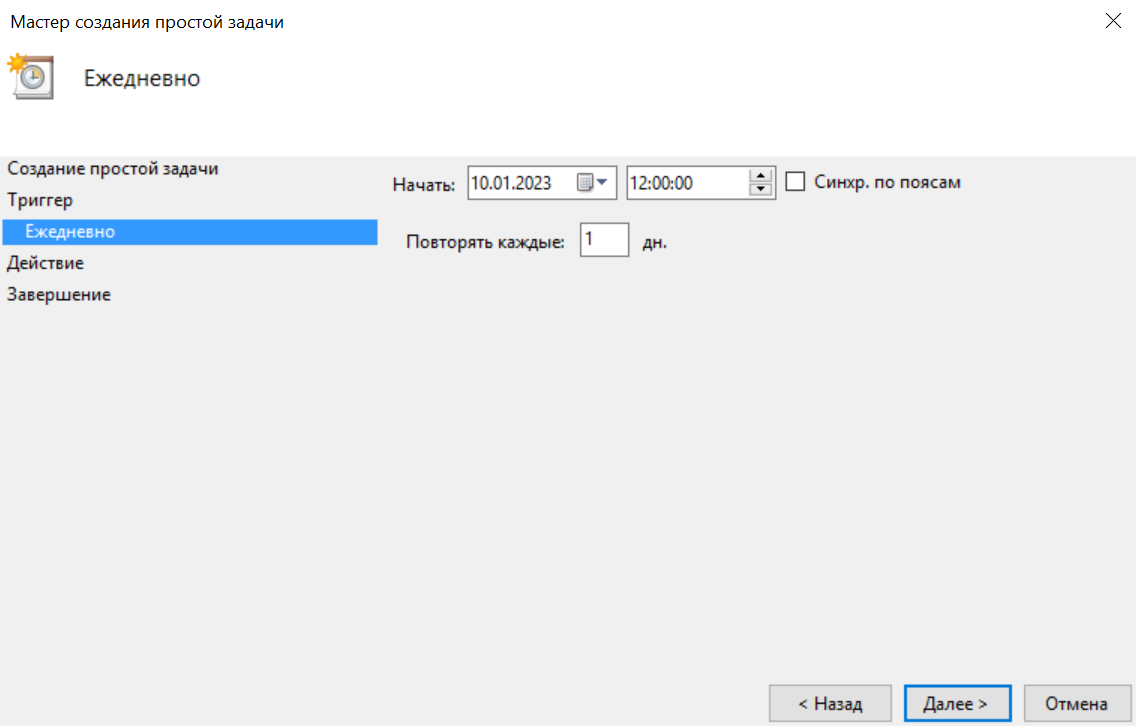

Так как наша цель - запустить EXE-файл, то в следующем окне выбираем запуск программы

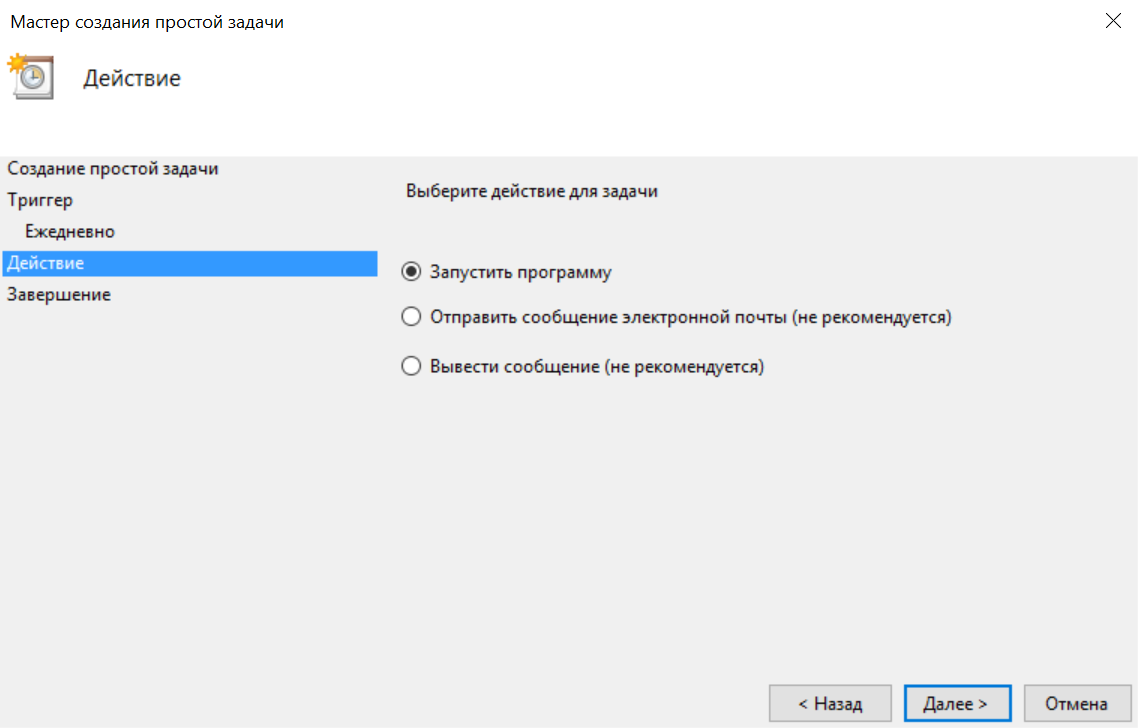

Далее указываем программу, которую хотим запустить. Здесь как раз и надо выбрать наш EXE-файл. А в аргументах и рабочей папке указываем путь до той папки, в которой наш файл лежит

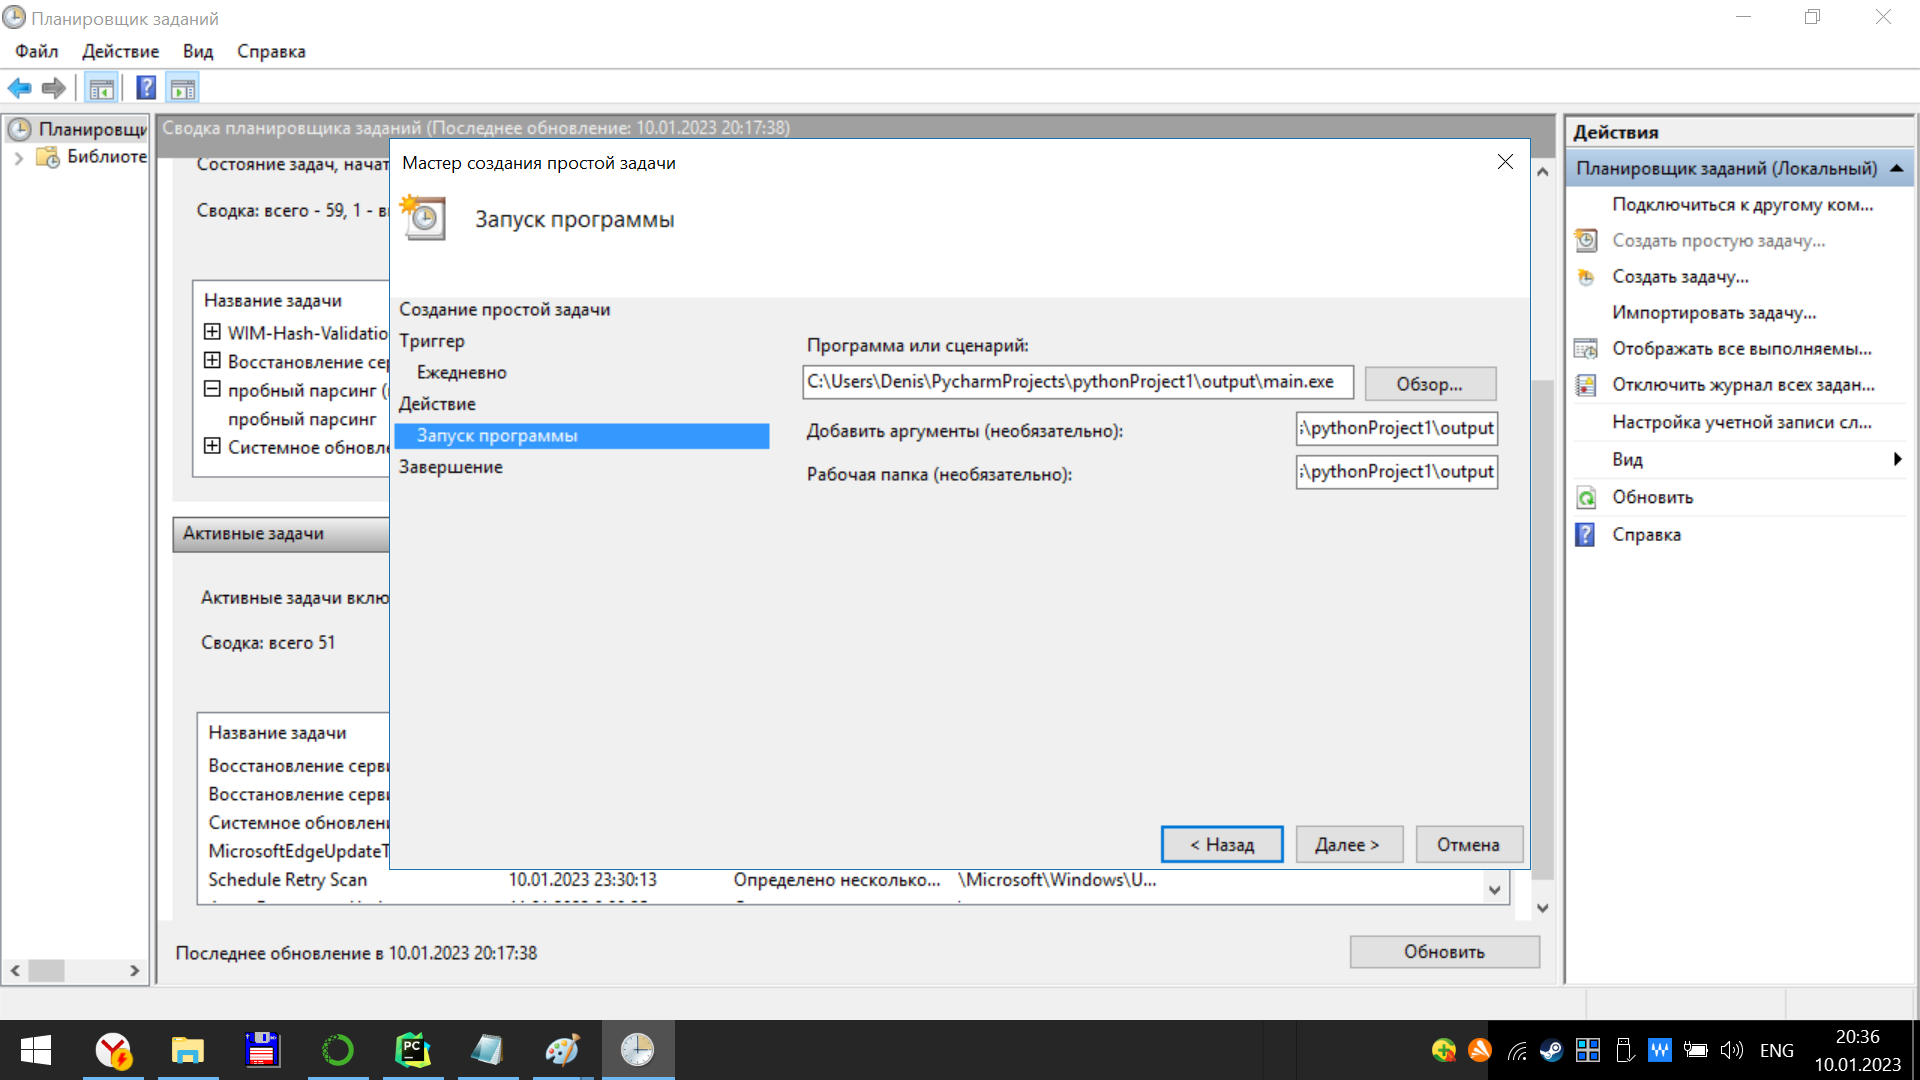

Получаем сводку по нашей задаче. Ставим галочку, чтобы открыть окно "Свойства", потому что дальше это нам понадобится

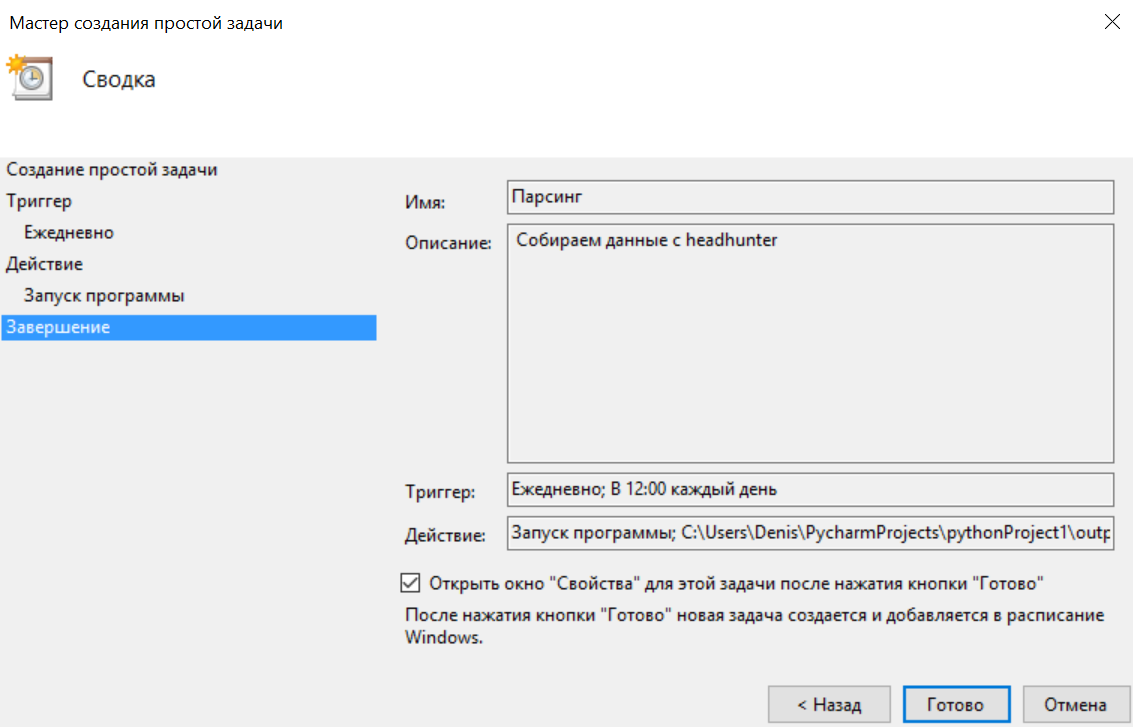

Настроим свойства. В моем случае для корректной работы помогла настройка, которая будет показана далее

Обязательно нужно поставить галочку для выполнения задачи с наивысшими правами

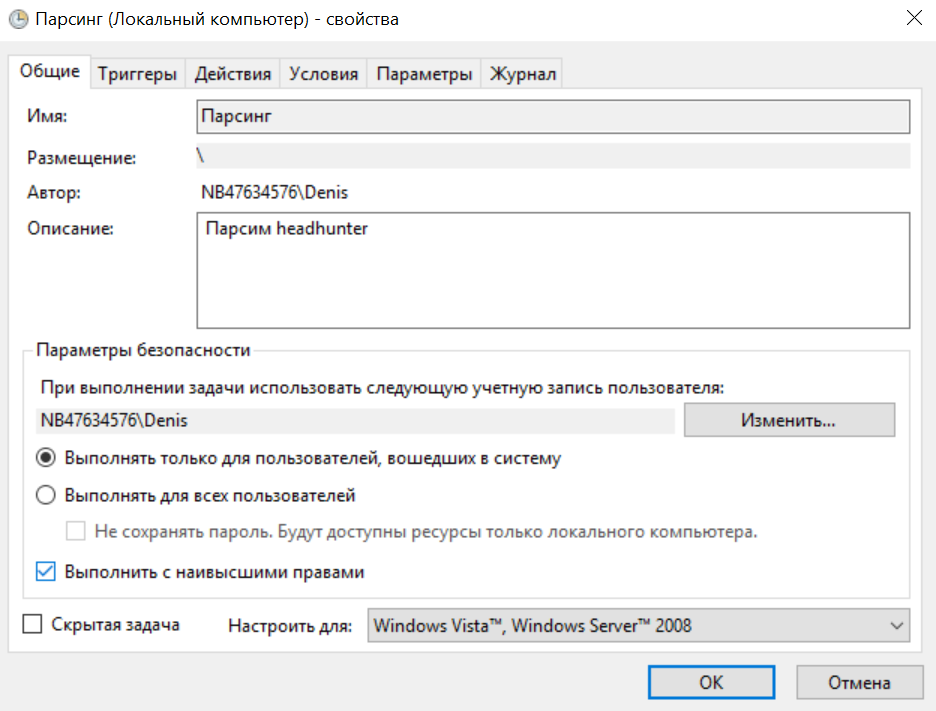

Также обязательно в условиях поставить галочку для пробуждения компьютера для выполнения задачи

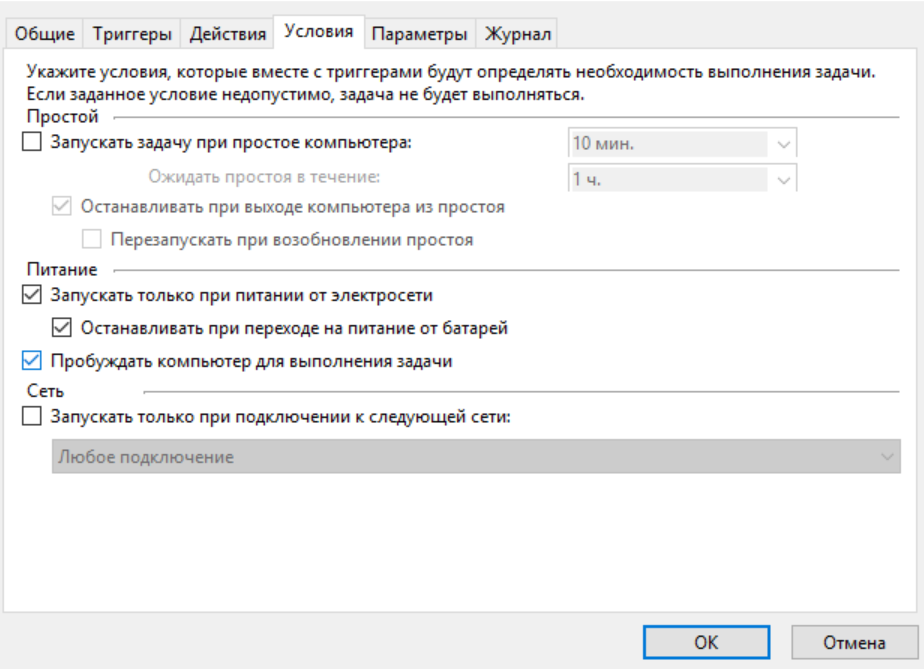

Сейчас расскажу, почему та галочка была так необходима

Минус планировщика задач в том, что если компьютер будет выключен (или будет находиться в режиме сна, но не будет стоять галочка на пробуждение компьютера), то задача выполнится только тогда, когда компьютер будет включен. Для меня это не критично, потому что я никогда не выключаю компьютер и он всегда у меня находится в режиме сна. Также у меня на компьютере стоит маленькое время для перехода ккомпьютера ко сну, поэтому когда в заданное время компьютер будет пробуждаться, он выполнит задачу и через 10 минут уйдет обратно в сон. Если какой-то пользователь любит выключать компьютер и понимает, что не сможет постоянно следить за тем, чтобы компьютер был в режиме сна, можно через bios настроить также автоматическое включение компьютера в заданное время 

Сохраняем итоговые свойства задачи. Теперь осталось дождаться того времени, которое вы указали в задаче, чтобы проверить, все ли получилось правильно

Вот такая вот получилась автоматизация, при этом бесплатная

## Анализ таблички 

Прошло много дней и у вас уже имеется хорошая база данных. Пришло время приступать к анализу. Проводить его лучше всего в Excel, но у нас пока есть только лишь файл csv

Ничего страшного, запускаем Excel, создаем пустую страницу и во вкладке "Файл" выбираем "Открыть" 

Находим нашу папку "output", но видим, что она пустая. Для того, чтбы увидеть тут наш csv файл, надо поменять формат поиска на "Все файлы (*.*)". Теперь мы видим наш файл "hhparcer"

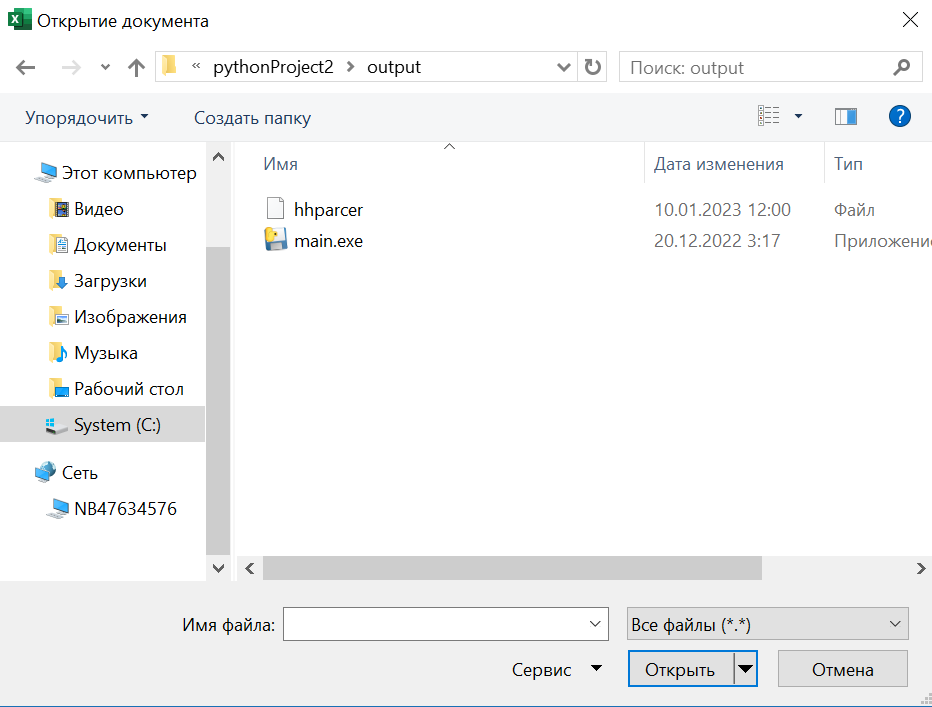

Открывем его, нажимаем "Далее" и на 2 шаге выбираем в качестве разделителя ";"

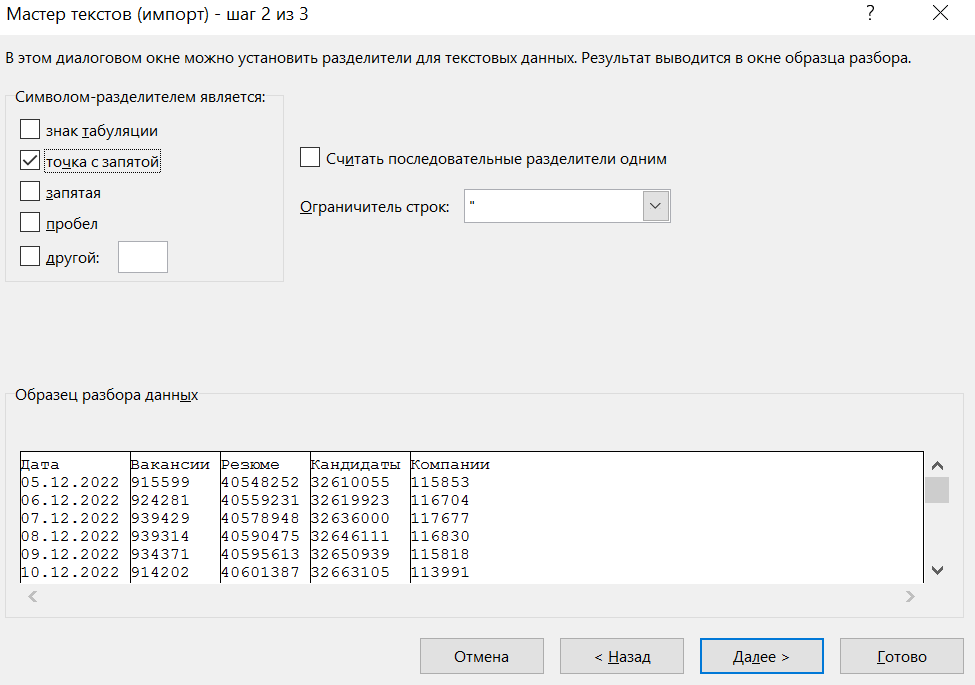

Жмем "Далее", затем "Готово"

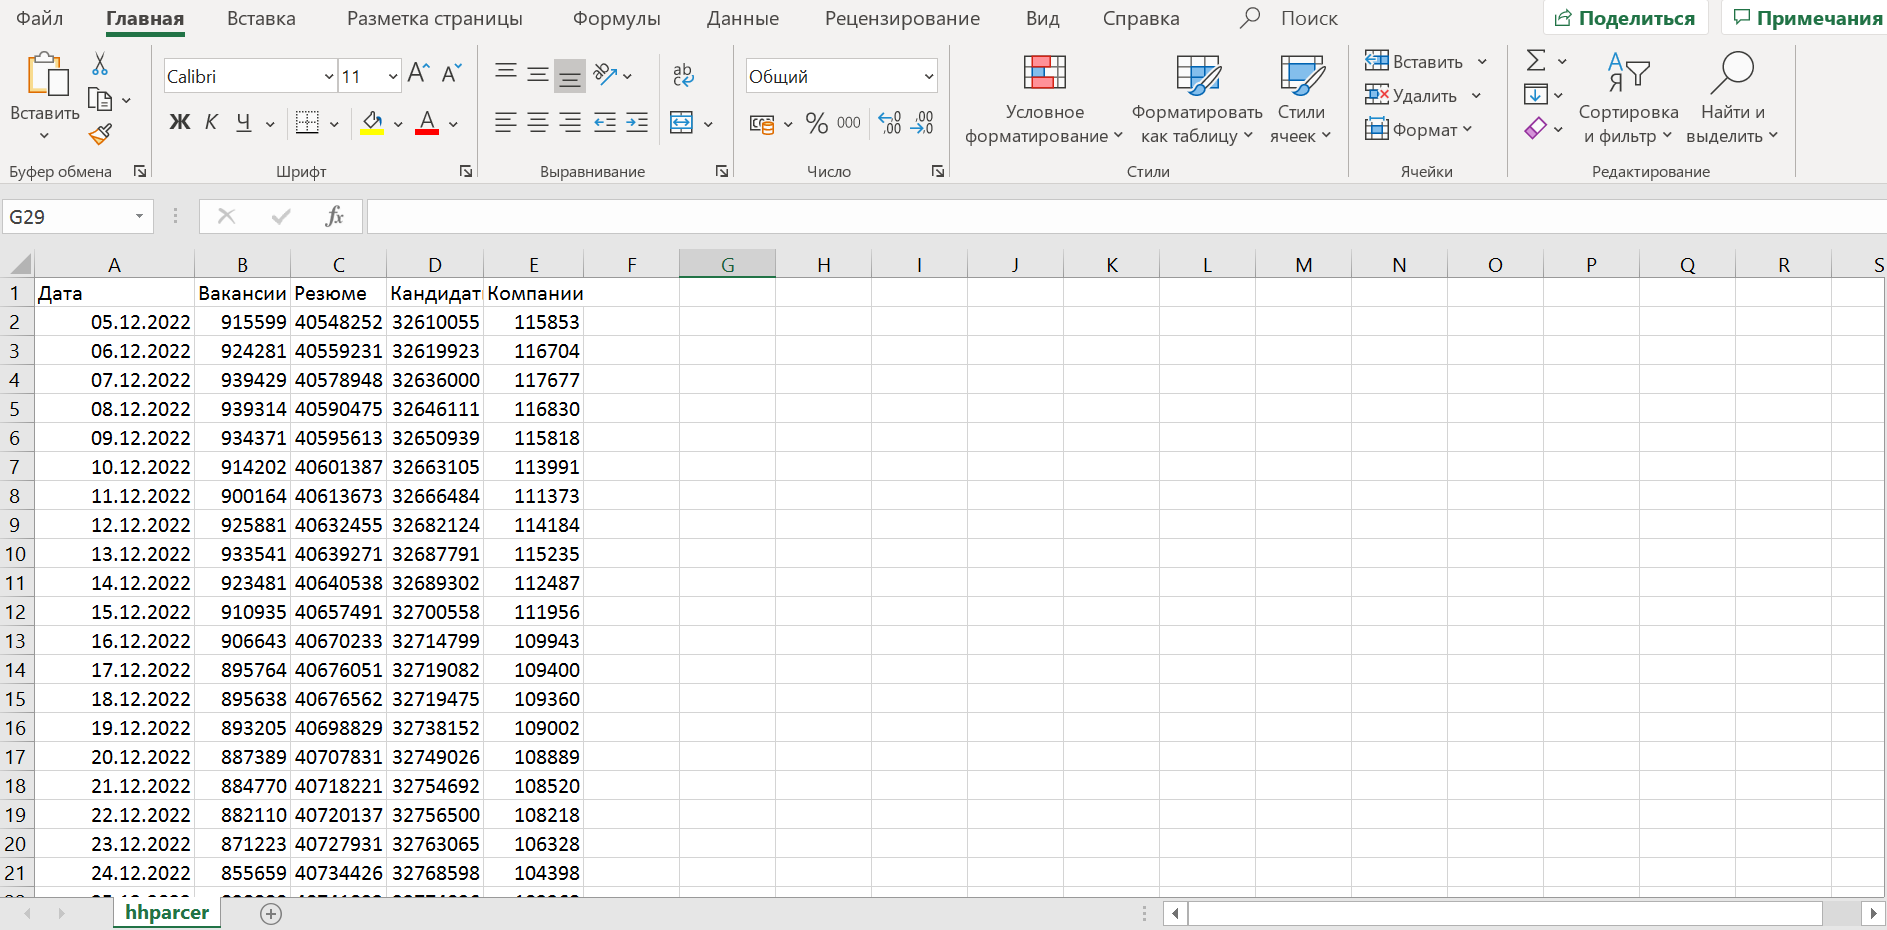

Теперь перед вами красивая Excel таблица, с которой дальше можно делать что угодно 

### На этом всё!

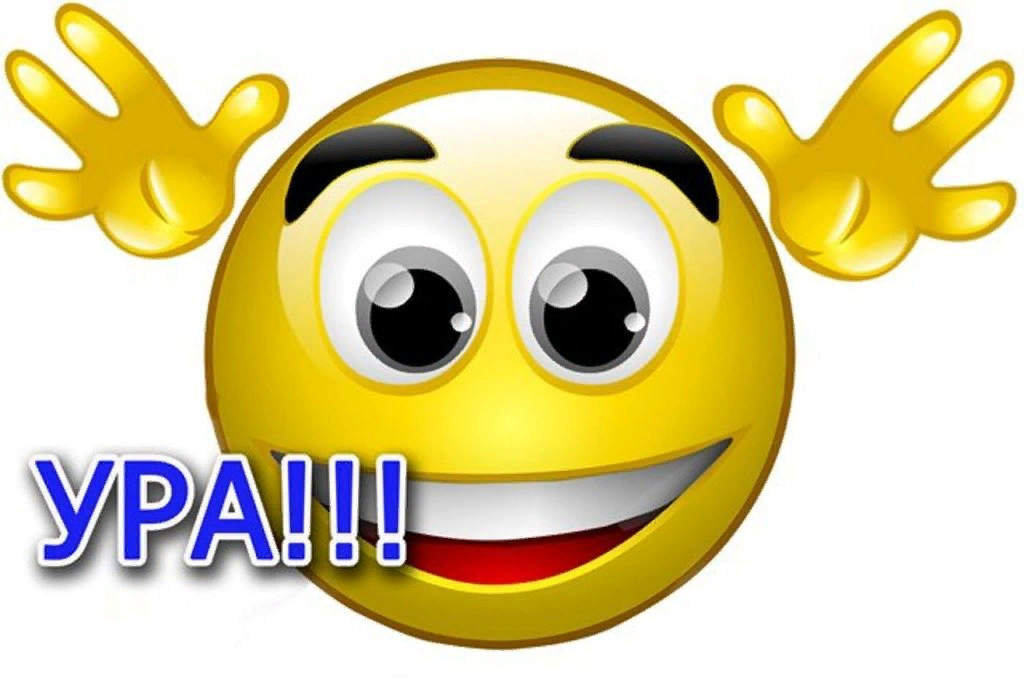